In [ ]:
import pandas as pd
df = pd.read_csv("mini_sales_100.csv")
df.head()

,order_id,customer,city,category,price,quantity,order_date,rating
0,201,Ali,Srinagar,Electronics,45000,1.0,2025-01-01,4.5
1,202,Ayaan,Pampore,Clothing,1200,2.0,2025-01-02,4.0
2,203,Zara,Srinagar,Books,450,3.0,2025-01-03,3.8
3,204,Huzaifa,Anantnag,Electronics,52000,1.0,2025-01-04,4.7
4,205,Sana,Pulwama,Clothing,1500,NaN,2025-01-05,4.1


In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    110 non-null    int64  
 1   customer    110 non-null    str    
 2   city        110 non-null    str    
 3   category    110 non-null    str    
 4   price       110 non-null    int64  
 5   quantity    108 non-null    float64
 6   order_date  110 non-null    str    
 7   rating      105 non-null    float64
dtypes: float64(2), int64(2), str(4)
memory usage: 7.0 KB


In [ ]:
# Convert date column as its type is str
df["order_date"] = pd.to_datetime(df["order_date"])

In [ ]:
df.tail()

,order_id,customer,city,category,price,quantity,order_date,rating
105,306,Neha,Pampore,Clothing,20,1.0,2025-04-17,1.5
106,307,Faisal,Anantnag,Books,10000,1.0,2025-04-18,2.5
107,308,Areeba,Pulwama,Groceries,25000,1.0,2025-04-19,3.0
108,309,Hamza,Srinagar,Electronics,180000,2.0,2025-04-20,4.6
109,310,Rida,Pampore,Clothing,15000,40.0,2025-04-21,3.8


In [ ]:
import sqlite3

conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

query = """
SELECT category, SUM(price * quantity) AS total_sales
FROM sales
GROUP BY category;
"""

result = pd.read_sql(query, conn)
print(result)

      category  total_sales
0        Books      27955.0
1     Clothing    1229649.0
2  Electronics    2151000.0
3    Groceries     112390.0


In [ ]:
import requests

url = "http://127.0.0.1:5000/sales"
response = requests.get(url)

data = response.json()
df2 = pd.DataFrame(data)

df2.head()

,category,city,customer,order_date,order_id,price,quantity,rating
0,Electronics,Srinagar,Ali,2025-01-01 00:00:00,201,45000,1.0,4.5
1,Clothing,Pampore,Ayaan,2025-01-02 00:00:00,202,1200,2.0,4.0
2,Books,Srinagar,Zara,2025-01-03 00:00:00,203,450,3.0,3.8
3,Electronics,Anantnag,Huzaifa,2025-01-04 00:00:00,204,52000,1.0,4.7
4,Clothing,Pulwama,Sana,2025-01-05 00:00:00,205,1500,NaN,4.1


In [ ]:
# Check missing values
missing = df.isnull().sum()
print(missing)
# Fill missing values
df["quantity"]= df["quantity"].fillna(df["quantity"].median())
df["rating"]= df["rating"].fillna(df["rating"].mean())


order_id      0
customer      0
city          0
category      0
price         0
quantity      2
order_date    0
rating        5
dtype: int64


In [ ]:
df = pd.read_csv("mini_sales_100.csv")

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["price"] < lower) | (df["price"] > upper)]
outliers


,order_id,customer,city,category,price,quantity,order_date,rating
100,301,Ayaan,Srinagar,Electronics,250000,1.0,2025-04-12,4.8
104,305,Imran,Srinagar,Electronics,300000,1.0,2025-04-16,4.9
108,309,Hamza,Srinagar,Electronics,180000,2.0,2025-04-20,4.6


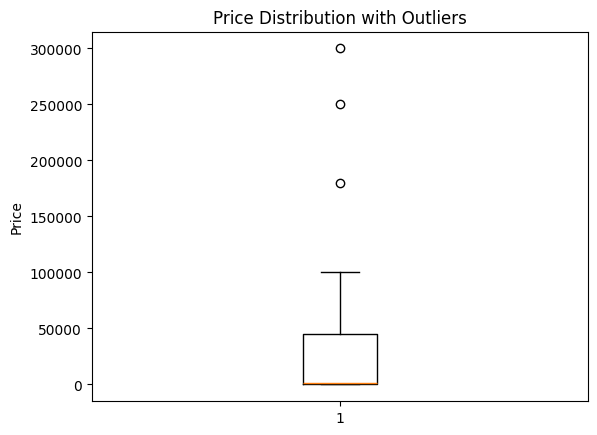

In [ ]:
import matplotlib.pyplot as plt

# Box plot for price
plt.figure()
plt.boxplot(df["price"])
plt.title("Price Distribution with Outliers")
plt.ylabel("Price")
plt.show()

In [ ]:
df_clean = df[(df["price"] >= lower) & (df["price"] <= upper)]
df_clean.to_csv("mini_sales_clean.csv", index=False)


In [ ]:
df_clean.info()
df_clean.describe()

In [ ]:
# 1) Sales by Category
sales_by_category = df_clean.groupby("category")["total"].sum()
print(sales_by_category)

# 2) Average Rating by City
avg_rating_city = df_clean.groupby("city")["rating"].mean()
print(avg_rating_city)

# 3) Orders Over Time
orders_over_time = df_clean.groupby("order_date").size()
print(orders_over_time.head())

# 4) Top 5 Customers by Spend
top_customers = df_clean.groupby("customer")["total"].sum().sort_values(ascending=False).head()
print(top_customers)